##### Initialization

In [1]:
import cv2
import numpy as np
import os
import shutil
from matplotlib import pyplot as plt
import mediapipe as mp
from PIL import Image

### 1.0 Extract Keypoints from Video

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image,model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Color conversion from BGR to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is no longer writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)   # Color conversion RGB to BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)    # Draw right connections

def draw_styled_landmarks(image,results):
    # Draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(0,0,255), thickness=5,circle_radius=5),
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=5,circle_radius=5)
                              )
    # Draw left hand connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=5,circle_radius=5),
                              mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=5,circle_radius=5)
                              )
    # Draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=5,circle_radius=5),
                              mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=5,circle_radius=5)
                              )
    
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,lh,rh])

##### Directory

In [ ]:
video_directory = r'videos_preprocess'

##### Setting up paths

In [6]:
# Get all file names in the directory
gestures_files = os.listdir(video_directory)

gesture_folder = np.array(gestures_files)
print('Total Gestures: ', len(gesture_folder))
print(gesture_folder)

Total Gestures:  2000
['a' 'a lot' 'abdomen' ... 'your' 'yourself' 'zero']


In [8]:
total = 0

for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]
            gesture.append(ges)

    total += len(gesture)

    print(gestures, end =" : ")        
    print(len(gesture))

print('Total Videos: ', total)

a : 5
a lot : 7
abdomen : 5
able : 5
about : 8
above : 6
accent : 5
accept : 9
accident : 14
accomplish : 4
accountant : 4
across : 8
act : 4
action : 6
active : 6
activity : 6
actor : 7
adapt : 5
add : 8
address : 4
adjective : 5
adjust : 4
admire : 3
admit : 5
adopt : 6
adult : 8
advanced : 5
advantage : 4
adverb : 5
affect : 5
afraid : 6
africa : 13
after : 7
afternoon : 9
again : 12
against : 5
age : 9
agenda : 5
ago : 9
agree : 7
agreement : 4
ahead : 5
aid : 6
aim : 3
airplane : 7
alarm : 6
alcohol : 5
algebra : 5
all : 13
all day : 5
allergy : 5
alligator : 4
allow : 9
almost : 8
alone : 9
alphabet : 3
already : 8
also : 8
always : 10
amazing : 4
america : 8
amputate : 4
analyze : 8
anatomy : 4
and : 6
angel : 8
angle : 6
angry : 8
animal : 10
anniversary : 5
announce : 6
annoy : 4
another : 6
answer : 8
any : 8
anyway : 5
apart : 4
apartment : 7
apostrophe : 6
appear : 7
appetite : 5
apple : 14
appointment : 10
appreciate : 5
approach : 6
appropriate : 6
approve : 11
april : 6


In [23]:
# Estimated Time
time = sum * 18 / 60
print('Estimated Time: ', time, 'minutes')

Estimated Time:  410.4 minutes


In [9]:
# Create landmark folder
for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]
            gesture.append(ges)
            
    for ges in gesture:
        file = os.path.splitext(ges)
        pre_path = os.path.join(video_directory, gestures, file[0])
        landmark_path = os.path.join(video_directory, gestures, file[0], 'landmarks')
        npy_path = os.path.join(landmark_path, )
                    
        if not os.path.exists(landmark_path):
            os.makedirs(landmark_path)
            print(landmark_path + " created")
        else:
            print(landmark_path + " already exists")
            # # if exist, delete folder and recreate the folder
            # shutil.rmtree(pre_path, ignore_errors=True)
            # os.makedirs(landmark_path)
            # print("Exisiting " + landmark_path + " deleted and recreated")

videos_preprocess\a\1\landmarks already exists
videos_preprocess\a\2\landmarks already exists
videos_preprocess\a\3\landmarks already exists
videos_preprocess\a\4\landmarks already exists
videos_preprocess\a\5\landmarks already exists
videos_preprocess\a lot\1\landmarks already exists
videos_preprocess\a lot\2\landmarks already exists
videos_preprocess\a lot\3\landmarks already exists
videos_preprocess\a lot\4\landmarks already exists
videos_preprocess\a lot\5\landmarks already exists
videos_preprocess\a lot\6\landmarks already exists
videos_preprocess\a lot\7\landmarks already exists
videos_preprocess\abdomen\1\landmarks already exists
videos_preprocess\abdomen\2\landmarks already exists
videos_preprocess\abdomen\3\landmarks already exists
videos_preprocess\abdomen\4\landmarks already exists
videos_preprocess\abdomen\5\landmarks already exists
videos_preprocess\able\1\landmarks already exists
videos_preprocess\able\2\landmarks already exists
videos_preprocess\able\3\landmarks already 

In [10]:
# Create save location array
save_location_arr = []

for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]
            gesture.append(ges)
            
    for ges in gesture:
        file = os.path.splitext(ges)
        save_location_arr.append(os.path.join(video_directory, gestures, file[0]))

print(save_location_arr)

['videos_preprocess\\a\\1', 'videos_preprocess\\a\\2', 'videos_preprocess\\a\\3', 'videos_preprocess\\a\\4', 'videos_preprocess\\a\\5', 'videos_preprocess\\a lot\\1', 'videos_preprocess\\a lot\\2', 'videos_preprocess\\a lot\\3', 'videos_preprocess\\a lot\\4', 'videos_preprocess\\a lot\\5', 'videos_preprocess\\a lot\\6', 'videos_preprocess\\a lot\\7', 'videos_preprocess\\abdomen\\1', 'videos_preprocess\\abdomen\\2', 'videos_preprocess\\abdomen\\3', 'videos_preprocess\\abdomen\\4', 'videos_preprocess\\abdomen\\5', 'videos_preprocess\\able\\1', 'videos_preprocess\\able\\2', 'videos_preprocess\\able\\3', 'videos_preprocess\\able\\4', 'videos_preprocess\\able\\5', 'videos_preprocess\\about\\1', 'videos_preprocess\\about\\2', 'videos_preprocess\\about\\3', 'videos_preprocess\\about\\4', 'videos_preprocess\\about\\5', 'videos_preprocess\\about\\6', 'videos_preprocess\\about\\7', 'videos_preprocess\\about\\8', 'videos_preprocess\\above\\1', 'videos_preprocess\\above\\2', 'videos_preprocess\\ab

In [11]:
# Video Path array
video_path_arr = []

for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]
            gesture.append(ges)
            
    for ges in gesture:
        file = os.path.splitext(ges)
        video_path_arr.append(os.path.join(video_directory, gestures, file[0] + '.mp4'))

print(video_path_arr)

['videos_preprocess\\a\\1.mp4', 'videos_preprocess\\a\\2.mp4', 'videos_preprocess\\a\\3.mp4', 'videos_preprocess\\a\\4.mp4', 'videos_preprocess\\a\\5.mp4', 'videos_preprocess\\a lot\\1.mp4', 'videos_preprocess\\a lot\\2.mp4', 'videos_preprocess\\a lot\\3.mp4', 'videos_preprocess\\a lot\\4.mp4', 'videos_preprocess\\a lot\\5.mp4', 'videos_preprocess\\a lot\\6.mp4', 'videos_preprocess\\a lot\\7.mp4', 'videos_preprocess\\abdomen\\1.mp4', 'videos_preprocess\\abdomen\\2.mp4', 'videos_preprocess\\abdomen\\3.mp4', 'videos_preprocess\\abdomen\\4.mp4', 'videos_preprocess\\abdomen\\5.mp4', 'videos_preprocess\\able\\1.mp4', 'videos_preprocess\\able\\2.mp4', 'videos_preprocess\\able\\3.mp4', 'videos_preprocess\\able\\4.mp4', 'videos_preprocess\\able\\5.mp4', 'videos_preprocess\\about\\1.mp4', 'videos_preprocess\\about\\2.mp4', 'videos_preprocess\\about\\3.mp4', 'videos_preprocess\\about\\4.mp4', 'videos_preprocess\\about\\5.mp4', 'videos_preprocess\\about\\6.mp4', 'videos_preprocess\\about\\7.mp4',

Clear npy files

In [29]:
import os
import glob

# Define the root directory where glosses are stored
video_directory = "videos_preprocess"  # Change this to your dataset directory

# Loop through each gloss (gesture folder)
for gloss in os.listdir(video_directory):
    gloss_path = os.path.join(video_directory, gloss)
    
    # Check if it's a directory
    if os.path.isdir(gloss_path):
        # Loop through each video folder inside the gloss folder
        for video in os.listdir(gloss_path):
            video_path = os.path.join(gloss_path, video, "landmarks")
            
            # Check if landmarks folder exists
            if os.path.exists(video_path):
                # Find all .npy files inside landmarks folder
                npy_files = glob.glob(os.path.join(video_path, "*.npy"))
                
                # Delete each .npy file
                for npy_file in npy_files:
                    os.remove(npy_file)
                    print(f"Deleted: {npy_file}")


Deleted: videos_preprocess\a\1\landmarks\1.npy
Deleted: videos_preprocess\a\1\landmarks\10.npy
Deleted: videos_preprocess\a\1\landmarks\11.npy
Deleted: videos_preprocess\a\1\landmarks\12.npy
Deleted: videos_preprocess\a\1\landmarks\13.npy
Deleted: videos_preprocess\a\1\landmarks\14.npy
Deleted: videos_preprocess\a\1\landmarks\15.npy
Deleted: videos_preprocess\a\1\landmarks\16.npy
Deleted: videos_preprocess\a\1\landmarks\17.npy
Deleted: videos_preprocess\a\1\landmarks\18.npy
Deleted: videos_preprocess\a\1\landmarks\19.npy
Deleted: videos_preprocess\a\1\landmarks\2.npy
Deleted: videos_preprocess\a\1\landmarks\20.npy
Deleted: videos_preprocess\a\1\landmarks\21.npy
Deleted: videos_preprocess\a\1\landmarks\22.npy
Deleted: videos_preprocess\a\1\landmarks\23.npy
Deleted: videos_preprocess\a\1\landmarks\24.npy
Deleted: videos_preprocess\a\1\landmarks\25.npy
Deleted: videos_preprocess\a\1\landmarks\26.npy
Deleted: videos_preprocess\a\1\landmarks\27.npy
Deleted: videos_preprocess\a\1\landmarks\2

Rename folder

In [14]:
import os

root_dir = "videos_preprocess"  # Root directory containing gloss folders

# Loop through each gloss folder
for gloss in os.listdir(root_dir):
    gloss_path = os.path.join(root_dir, gloss)
    if not os.path.isdir(gloss_path):
        continue

    # Get all subfolders whose names are numeric
    video_dirs = [d for d in os.listdir(gloss_path) if os.path.isdir(os.path.join(gloss_path, d)) and d.isdigit()]

    if not video_dirs:
        continue

    # Sort the video directories numerically
    video_dirs = sorted(video_dirs, key=lambda x: int(x))
    
    # First, rename each folder to a temporary name to avoid conflicts
    for folder in video_dirs:
        old_path = os.path.join(gloss_path, folder)
        temp_path = os.path.join(gloss_path, f"temp_{folder}")
        os.rename(old_path, temp_path)

    # Get all temporary folders and sort them by their original numeric part
    temp_video_dirs = sorted([d for d in os.listdir(gloss_path) if d.startswith("temp_")],
                             key=lambda x: int(x.replace("temp_", "")))

    # Now, rename them sequentially starting at "1"
    for i, temp_folder in enumerate(temp_video_dirs, start=1):
        old_temp_path = os.path.join(gloss_path, temp_folder)
        new_path = os.path.join(gloss_path, str(i))
        os.rename(old_temp_path, new_path)
        print(f"Renamed {old_temp_path} to {new_path}")


Renamed videos_preprocess\a\temp_1 to videos_preprocess\a\1
Renamed videos_preprocess\a\temp_2 to videos_preprocess\a\2
Renamed videos_preprocess\a\temp_3 to videos_preprocess\a\3
Renamed videos_preprocess\a\temp_4 to videos_preprocess\a\4
Renamed videos_preprocess\a\temp_5 to videos_preprocess\a\5
Renamed videos_preprocess\a lot\temp_1 to videos_preprocess\a lot\1
Renamed videos_preprocess\a lot\temp_2 to videos_preprocess\a lot\2
Renamed videos_preprocess\a lot\temp_3 to videos_preprocess\a lot\3
Renamed videos_preprocess\a lot\temp_4 to videos_preprocess\a lot\4
Renamed videos_preprocess\a lot\temp_5 to videos_preprocess\a lot\5
Renamed videos_preprocess\a lot\temp_6 to videos_preprocess\a lot\6
Renamed videos_preprocess\a lot\temp_7 to videos_preprocess\a lot\7
Renamed videos_preprocess\abdomen\temp_1 to videos_preprocess\abdomen\1
Renamed videos_preprocess\abdomen\temp_2 to videos_preprocess\abdomen\2
Renamed videos_preprocess\abdomen\temp_3 to videos_preprocess\abdomen\3
Renamed 

##### Extracting landmarks

In [ ]:

# Iterate through the video path array and save the landmarks
for video_path, save_location in zip(video_path_arr, save_location_arr):
    
    landmarks_dir = os.path.join(save_location, "landmarks")
    
    # Check if landmarks already exist (i.e. at least 30 .npy files)
    if os.path.exists(landmarks_dir) and len([f for f in os.listdir(landmarks_dir) if f.endswith('.npy')]) >= 30:
        print(f"Landmarks already extracted for {video_path}, skipping...")
        continue
    
    video = cv2.VideoCapture(video_path)

    frames = []
    found_movement = False  # Flag to detect the first movement

    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break  # Stop if no more frames

        with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1, model_complexity=2, smooth_landmarks=True) as holistic:
            frame, results = mediapipe_detection(frame, holistic)

            # Check for hand movement
            if results.left_hand_landmarks or results.right_hand_landmarks:
                found_movement = True

            if found_movement:
                frames.append(results)  # Store keypoints

        # if len(frames) >= 30:  # Stop collecting after 30 frames
        #     break

    video.release()
    cv2.destroyAllWindows()


    if len(frames) == 0:
        print(f"Invalid keypoints detected for {video_path}. Removing directory: {save_location}")
        shutil.rmtree(save_location)
        continue
    else:
        # Handle too many or too few frames
        if len(frames) > 30:
            print(f"Exceed {len(frames)-30} frames!")
            indices = np.linspace(0, len(frames) - 1, 30, dtype=int)  # Select 30 evenly spaced frames
            frames = [frames[i] for i in indices]
        elif len(frames) < 30:
            print(f"Insufficient {30-len(frames)} frames!")
            frames += [frames[-1]] * (30 - len(frames))  # Repeat last frame if not enough

    # Save keypoints
    for frame_count, results in enumerate(frames, 1):
        npy_save_path = f'{save_location}/landmarks/{frame_count}.npy'
        np.save(npy_save_path, extract_keypoints(results))

    print(f"Processed: {video_path} - {len(frames)} frames saved.")

Landmarks already extracted for videos_preprocess\a\1.mp4, skipping...
Landmarks already extracted for videos_preprocess\a\2.mp4, skipping...
Landmarks already extracted for videos_preprocess\a\3.mp4, skipping...
Landmarks already extracted for videos_preprocess\a\4.mp4, skipping...
Landmarks already extracted for videos_preprocess\a\5.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\1.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\2.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\3.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\4.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\5.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\6.mp4, skipping...
Landmarks already extracted for videos_preprocess\a lot\7.mp4, skipping...
Landmarks already extracted for videos_preprocess\abdomen\1.mp4, skipping...
Landmarks already extracted for videos_prep

After extract the landmarks, need to rename again because there are some directory has been removed due to undetected landmarks on video

Extracting landmarks + Frame Dropping and Interpolation for Frames Disperancy

### 2.0 Missing Keypoints Reconstruction

##### Defining functions

In [28]:
def initialize_hand_keypoints(frames_keypoints):
    """
    Initialize and the hand keypoints in a sequence of frames.

    Parameters:
    frames_keypoints (list of np.ndarray): List where each entry is a numpy array representing keypoints 
                                           for a frame, or None if keypoints are missing in that frame.
                                           
    Returns:
    list of np.ndarray: List with hand keypoints initialized and interpolated as needed.
    """
    # Define indices for left and right hand keypoints within the overall keypoint array
    pose_keypoints_count = 33 * 4
    left_hand_start = pose_keypoints_count
    left_hand_end = left_hand_start + 21 * 3
    right_hand_start = left_hand_end
    right_hand_end = right_hand_start + 21 * 3

    '''
    array[1, 1, 1, 1, 0, 0 ,0 ,1 ,1 ,1]
    '''
    
    # Extract valid hand keypoints for averaging
    valid_left_hand_keypoints = [kp[left_hand_start:left_hand_end] for kp in frames_keypoints if kp is not None and (kp[left_hand_start] != 0.00000000e+00)]
    valid_right_hand_keypoints = [kp[right_hand_start:right_hand_end] for kp in frames_keypoints if kp is not None and (kp[right_hand_start] != 0.00000000e+00)]
    
    print("valid_left_hand", len(valid_left_hand_keypoints))
    print("valid_right_hand", len(valid_right_hand_keypoints))

    # Calculate average hand keypoints
    if valid_left_hand_keypoints:
        avg_left_hand = np.mean(valid_left_hand_keypoints, axis=0)
    else:
        avg_left_hand = np.zeros(21 * 3)
    
    if valid_right_hand_keypoints:
        avg_right_hand = np.mean(valid_right_hand_keypoints, axis=0)
    else:
        avg_right_hand = np.zeros(21 * 3)

    # Initialize the first and last frames if they have missing hand keypoints
    if frames_keypoints[0] is None or not np.any(frames_keypoints[0][left_hand_start:left_hand_end]):
        frames_keypoints[0][left_hand_start:left_hand_end] = avg_left_hand
    if frames_keypoints[0] is None or not np.any(frames_keypoints[0][right_hand_start:right_hand_end]):
        frames_keypoints[0][right_hand_start:right_hand_end] = avg_right_hand
    
    if frames_keypoints[-1] is None or not np.any(frames_keypoints[-1][left_hand_start:left_hand_end]):
        frames_keypoints[-1][left_hand_start:left_hand_end] = avg_left_hand
    if frames_keypoints[-1] is None or not np.any(frames_keypoints[-1][right_hand_start:right_hand_end]):
        frames_keypoints[-1][right_hand_start:right_hand_end] = avg_right_hand

    return frames_keypoints

In [29]:
def find_neighbour_keypoints(frames_keypoints, k, frame, hand_start, hand_end):
    alpha_left = alpha_right = beta_left = beta_right = None

    # Search for α (previous frame with keypoints)
    for a in range(1, k + 1):
        if frames_keypoints[k - a] is not None and np.any(frames_keypoints[k - a][hand_start:hand_end]):
            alpha_left = a
            break

    # Search for β (next frame with keypoints)
    for b in range(1, len(frames_keypoints) - k):
        if frames_keypoints[k + b] is not None and np.any(frames_keypoints[k + b][hand_start:hand_end]):
            beta_left = b
            break

    # If α and β are found, interpolate
    if alpha_left is not None and beta_left is not None:
        f_k_alpha_left = frames_keypoints[k - alpha_left][hand_start:hand_end]
        f_k_beta_left = frames_keypoints[k + beta_left][hand_start:hand_end]
        frame[hand_start:hand_end] = (beta_left * f_k_alpha_left + alpha_left * f_k_beta_left) / (alpha_left + beta_left)

def bilinear_interpolation(frames_keypoints):
    """
    Apply bilinear interpolation to fill missing hand keypoints based on the provided formula.
    
    Parameters:
    frames_keypoints (list of np.ndarray): List where each entry is a numpy array representing keypoints 
                                           for a frame, or None if keypoints are missing in that frame.
                                           
    Returns:
    list of np.ndarray: List of frames with interpolated hand keypoints.
    """
    # Define indices for left and right hand keypoints within the overall keypoint array
    pose_keypoints_count = 33 * 4
    left_hand_start = pose_keypoints_count
    left_hand_end = left_hand_start + 21 * 3
    right_hand_start = left_hand_end
    right_hand_end = right_hand_start + 21 * 3

    # Process each frame
    for k in range(len(frames_keypoints)):
        frame = frames_keypoints[k]
        
        # Check if current frame's hand keypoints are missing
        if frame is None or (frame[left_hand_start] == 0.00000000e+00 or frame[right_hand_start] == 0.00000000e+00):
            # Find α and β for left and right hands
            # Initialize α and β to None as we search

            if frame[left_hand_start] == 0.00000000e+00:
                find_neighbour_keypoints(frames_keypoints, k, frame, left_hand_start, left_hand_end)
                print('frame ', k + 1, ' left hand keypoints interpolated')

            if frame[right_hand_start] == 0.00000000e+00:
                find_neighbour_keypoints(frames_keypoints, k, frame, right_hand_start, right_hand_end)
                print('frame ', k + 1, ' right hand keypoints interpolated')

    return frames_keypoints

In [30]:
def load_keypoints(folder_path):
    """
    Load the keypoints from a given file path.
    
    Parameters:
    path (str): Path to the .npy file containing the keypoints.
    
    Returns:
    list of np.ndarray: List of frames where each frame is a numpy array representing keypoints.
    """
    frames_keypoints = []

    files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
    # print(files)

    # arrange files in ascending order
    files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    print(files)

    # Load the keypoints from the .npy file
    for file in files:
        file_path = os.path.join(folder_path, file)
        frame_keypoints = np.load(file_path)
        frames_keypoints.append(frame_keypoints)

    return frames_keypoints

In [31]:
def save_keypoints(frames_keypoints, folder_path):
    """
    Save the keypoints to a given file path.
    
    Parameters:
    frames_keypoints (list of np.ndarray): List of frames where each frame is a numpy array representing keypoints.
    folder_path (str): Path to the folder where the keypoints will be saved.
    """
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    else:
        # if exist, delete folder and recreate the folder
        shutil.rmtree(folder_path, ignore_errors=True)
        os.makedirs(folder_path)

    for i, frame_keypoints in enumerate(frames_keypoints):
        file_path = os.path.join(folder_path, f'{i + 1}.npy')
        np.save(file_path, frame_keypoints)

##### Directory

In [2]:
video_directory = r'WLASL-100'

##### Setting up paths

In [5]:
# Get all file names in the directory
gestures_files = os.listdir(video_directory)

gesture_folder = np.array(gestures_files)
print('Total Gestures: ', len(gesture_folder))
print(gesture_folder)

Total Gestures:  100
['accident' 'africa' 'again' 'all' 'apple' 'backpack' 'bad' 'basketball'
 'bed' 'before' 'bird' 'black' 'blue' 'bowling' 'brown' 'candy' 'change'
 'cheat' 'check' 'city' 'college' 'color' 'computer' 'cook' 'cool' 'corn'
 'cousin' 'cow' 'dance' 'dark' 'daughter' 'deaf' 'decide' 'different'
 'dog' 'drink' 'family' 'far' 'fine' 'finish' 'fish' 'forget' 'full'
 'give' 'go' 'good' 'graduate' 'hair' 'hat' 'headache' 'hearing' 'help'
 'hot' 'kiss' 'language' 'later' 'laugh' 'learn' 'letter' 'like' 'list'
 'man' 'many' 'meet' 'mother' 'need' 'no' 'now' 'orange' 'paper' 'pink'
 'pizza' 'pull' 'purple' 'school' 'secretary' 'shirt' 'short' 'son'
 'study' 'sunday' 'tall' 'teacher' 'tell' 'thanksgiving' 'thin' 'thursday'
 'trade' 'visit' 'wait' 'walk' 'water' 'white' 'who' 'woman' 'write'
 'wrong' 'year' 'yes' 'yesterday']


In [8]:
for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]  # Extract filename without extension
            gesture.append(ges)

    # Sort the gesture list numerically
    gesture.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

    print(gestures, end=" : ")
    print(gesture)


accident : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
africa : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
again : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
all : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13']
apple : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
backpack : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
bad : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
basketball : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
bed : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
before : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
bird : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']
black : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
blue

In [7]:
# Create landmark folder
for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]
            gesture.append(ges)
            
    for ges in gesture:
        file = os.path.splitext(ges)
        pre_path = os.path.join(video_directory, gestures, file[0])
        interpolated_path = os.path.join(video_directory, gestures, file[0], 'normalized')
        npy_path = os.path.join(interpolated_path, )
                    
        if not os.path.exists(interpolated_path):
            os.makedirs(interpolated_path)
            print(interpolated_path + " created")
        else:
            print(interpolated_path + " already exists")
            # # if exist, delete folder and recreate the folder
            # shutil.rmtree(pre_path, ignore_errors=True)
            # os.makedirs(interpolated_path)
            # print("Exisiting " + interpolated_path + " deleted and recreated")

WLASL-100\accident\1\normalized already exists
WLASL-100\accident\10\normalized already exists
WLASL-100\accident\11\normalized already exists
WLASL-100\accident\12\normalized already exists
WLASL-100\accident\13\normalized already exists
WLASL-100\accident\14\normalized already exists
WLASL-100\accident\2\normalized created
WLASL-100\accident\3\normalized created
WLASL-100\accident\4\normalized created
WLASL-100\accident\5\normalized created
WLASL-100\accident\6\normalized created
WLASL-100\accident\7\normalized created
WLASL-100\accident\8\normalized created
WLASL-100\accident\9\normalized created
WLASL-100\africa\1\normalized created
WLASL-100\africa\10\normalized created
WLASL-100\africa\11\normalized created
WLASL-100\africa\12\normalized created
WLASL-100\africa\13\normalized created
WLASL-100\africa\2\normalized created
WLASL-100\africa\3\normalized created
WLASL-100\africa\4\normalized created
WLASL-100\africa\5\normalized created
WLASL-100\africa\6\normalized created
WLASL-100

##### Bilinear Interpolation

In [53]:
# %%script false
# Perform interpolation on the landmarks
for gestures in gesture_folder:
    gesture = []

    for fname in os.listdir(os.path.join(video_directory, gestures)):
        path = os.path.join(video_directory, gestures, fname)
        if os.path.isdir(path):
            continue
        else:
            ges = os.path.splitext(fname)[0]
            gesture.append(ges)
            
    for ges in gesture:
        file = os.path.splitext(ges)
        load_path = os.path.join(video_directory, gestures, file[0], 'landmarks')
        save_path = os.path.join(video_directory, gestures, file[0], 'interpolated_landmarks')
        frames_keypoints = load_keypoints(load_path)
        frames_keypoints = initialize_hand_keypoints(frames_keypoints)
        frames_keypoints = bilinear_interpolation(frames_keypoints)
        save_keypoints(frames_keypoints, save_path)

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy', '10.npy', '11.npy', '12.npy', '13.npy', '14.npy', '15.npy', '16.npy', '17.npy', '18.npy', '19.npy', '20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '25.npy', '26.npy', '27.npy', '28.npy', '29.npy', '30.npy']
valid_left_hand 30
valid_right_hand 30
['1.npy', '2.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy', '10.npy', '11.npy', '12.npy', '13.npy', '14.npy', '15.npy', '16.npy', '17.npy', '18.npy', '19.npy', '20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '25.npy', '26.npy', '27.npy', '28.npy', '29.npy', '30.npy']
valid_left_hand 16
valid_right_hand 29
frame  2  left hand keypoints interpolated
frame  3  left hand keypoints interpolated
frame  4  left hand keypoints interpolated
frame  5  left hand keypoints interpolated
frame  6  left hand keypoints interpolated
frame  7  left hand keypoints interpolated
frame  8  left hand keypoints interpolated
frame  9  left hand keypoints interpo

In [5]:
video_directory = r'WLASL-100'

##### Single Frame

In [8]:
def plot_keypoints(keypoints, title):
    # Separate pose, left hand, and right hand keypoints based on sizes
    pose = keypoints[:33 * 4].reshape(-1, 4)        # 33 keypoints, each with [x, y, z, visibility]
    left_hand = keypoints[33 * 4:33 * 4 + 21 * 3].reshape(-1, 3)  # 21 keypoints for left hand, each with [x, y, z]
    right_hand = keypoints[33 * 4 + 21 * 3:].reshape(-1, 3)       # 21 keypoints for right hand, each with [x, y, z]

    # Define connections (edges) between keypoints for pose, left hand, and right hand
    # These connections are based on a standard pose model, such as MediaPipe's Pose model.
    pose_connections = [
        (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8), (9, 10),
        (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
        (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20), (23, 24),
        (23, 25), (24, 26), (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32)
    ]

    hand_connections = [
        (0, 1), (1, 2), (2, 3), (3, 4), # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8), # Index finger
        (0, 9), (9, 10), (10, 11), (11, 12), # Middle finger
        (0, 13), (13, 14), (14, 15), (15, 16), # Ring finger
        (0, 17), (17, 18), (18, 19), (19, 20) # Pinky
    ]

    # Plot keypoints with connections
    plt.figure(figsize=(4.8, 2.7))
    plt.axis([0, 1.125, 0, 2])

    # Plot pose keypoints and connections
    for (start, end) in pose_connections:
        plt.plot([pose[start, 0], pose[end, 0]], [pose[start, 1], pose[end, 1]], 'k-', lw=2)
    plt.scatter(pose[:, 0], pose[:, 1], label='Pose', s=20, alpha=0.7)

    # Plot left hand keypoints and connections
    for (start, end) in hand_connections:
        plt.plot([left_hand[start, 0], left_hand[end, 0]], [left_hand[start, 1], left_hand[end, 1]], 'b-', lw=2)
    plt.scatter(left_hand[:, 0], left_hand[:, 1], label='Left Hand', s=20, alpha=0.7)

    # Plot right hand keypoints and connections
    for (start, end) in hand_connections:
        plt.plot([right_hand[start, 0], right_hand[end, 0]], [right_hand[start, 1], right_hand[end, 1]], 'r-', lw=2)
    plt.scatter(right_hand[:, 0], right_hand[:, 1], label='Right Hand', s=20, alpha=0.7)

    # Adjust plot settings
    plt.title(title)
    plt.legend()
    # Adjust plot settings
    plt.legend()
    ax = plt.gca()
    leg = ax.get_legend()
    leg.legend_handles[0].set_color('black')
    leg.legend_handles[1].set_color('blue')
    leg.legend_handles[2].set_color('red')
    plt.axis('off')
    plt.gca().invert_yaxis()  # Invert Y axis for typical image coordinates
    plt.show()

In [24]:
def plot_normalized_keypoints(keypoints, title):
    # Separate pose, left hand, and right hand keypoints based on sizes
    pose = keypoints[:33 * 4].reshape(-1, 4)        # 33 keypoints, each with [x, y, z, visibility]
    left_hand = keypoints[33 * 4:33 * 4 + 21 * 3].reshape(-1, 3)  # 21 keypoints for left hand, each with [x, y, z]
    right_hand = keypoints[33 * 4 + 21 * 3:].reshape(-1, 3)       # 21 keypoints for right hand, each with [x, y, z]

    # Define connections (edges) between keypoints for pose, left hand, and right hand
    # These connections are based on a standard pose model, such as MediaPipe's Pose model.
    pose_connections = [
        (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8), (9, 10),
        (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
        (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20), (23, 24),
        (23, 25), (24, 26), (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32)
    ]

    hand_connections = [
        (0, 1), (1, 2), (2, 3), (3, 4), # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8), # Index finger
        (0, 9), (9, 10), (10, 11), (11, 12), # Middle finger
        (0, 13), (13, 14), (14, 15), (15, 16), # Ring finger
        (0, 17), (17, 18), (18, 19), (19, 20) # Pinky
    ]

    # Plot keypoints with connections
    plt.figure(figsize=(4.8, 2.7))
    plt.axis([1, 10, 0,5])

    # Plot pose keypoints and connections
    for (start, end) in pose_connections:
        plt.plot([pose[start, 0], pose[end, 0]], [pose[start, 1], pose[end, 1]], 'k-', lw=2)
    plt.scatter(pose[:, 0], pose[:, 1], label='Pose', s=20, alpha=0.7)

    # Plot left hand keypoints and connections
    for (start, end) in hand_connections:
        plt.plot([left_hand[start, 0], left_hand[end, 0]], [left_hand[start, 1], left_hand[end, 1]], 'b-', lw=2)
    plt.scatter(left_hand[:, 0], left_hand[:, 1], label='Left Hand', s=20, alpha=0.7)

    # Plot right hand keypoints and connections
    for (start, end) in hand_connections:
        plt.plot([right_hand[start, 0], right_hand[end, 0]], [right_hand[start, 1], right_hand[end, 1]], 'r-', lw=2)
    plt.scatter(right_hand[:, 0], right_hand[:, 1], label='Right Hand', s=20, alpha=0.7)

    # Adjust plot settings
    plt.title(title)
    plt.legend()
    # Adjust plot settings
    plt.legend()
    ax = plt.gca()
    leg = ax.get_legend()
    leg.legend_handles[0].set_color('black')
    leg.legend_handles[1].set_color('blue')
    leg.legend_handles[2].set_color('red')
    plt.axis('off')
    plt.gca().invert_yaxis()  # Invert Y axis for typical image coordinates
    plt.show()

In [21]:
def visualize_interpolation(gesture, video_num, frame_num):
    """
    Visualize the original and interpolated keypoints for a specific frame in a video.
    
    Parameters:
    gesture (str): Name of the gesture.
    video_num (int): Number of the video.
    frame_num (int): Number of the frame to visualize.
    """
    # Load original and interpolated keypoints
    npy_file = f'{frame_num}.npy'
    keypoints = np.load(os.path.join(video_directory, gesture, f'{video_num}', 'landmarks', npy_file))
    keypoints_interpolated = np.load(os.path.join(video_directory, gesture, f'{video_num}', 'normalized', npy_file))
    # keypoints_flipped = np.load(os.path.join(video_directory, gesture, f'{video_num:02}', 'flipped', npy_file))

    # Plot original and interpolated keypoints
    plot_keypoints(keypoints, title='Original Keypoints')
    # plot_keypoints(keypoints_interpolated, title='Interpolated Keypoints')
    plot_normalized_keypoints(keypoints_interpolated, title='Interpolated Keypoints')
    # plot_keypoints(keypoints_flipped, title='Flipped')

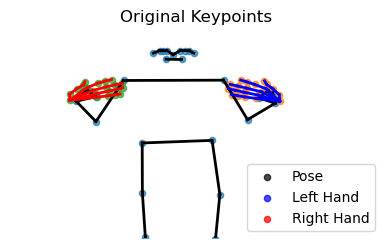

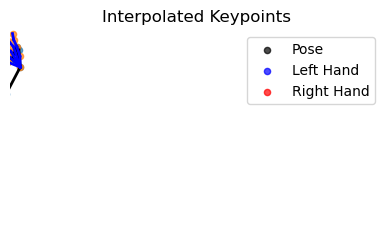

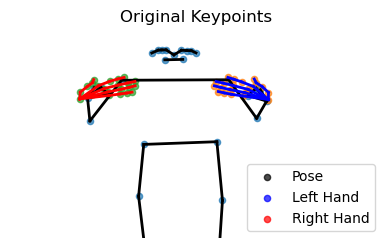

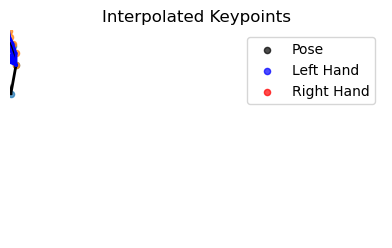

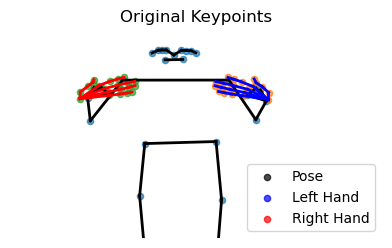

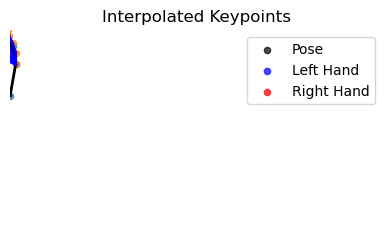

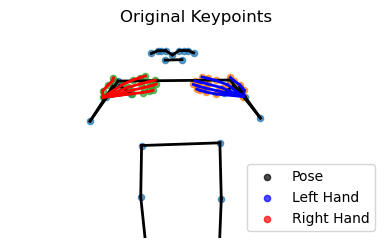

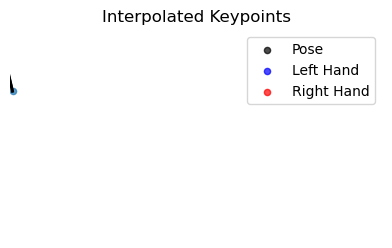

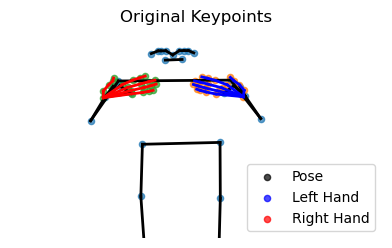

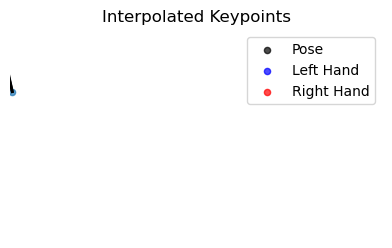

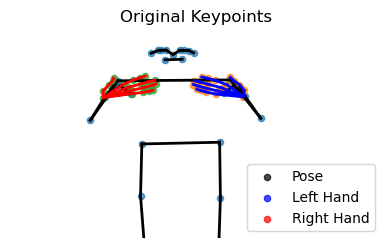

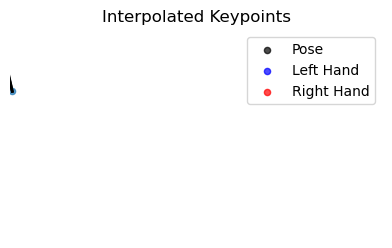

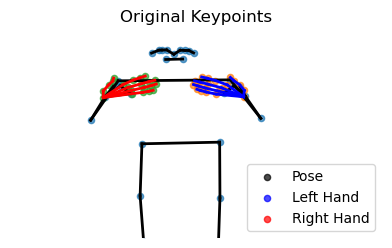

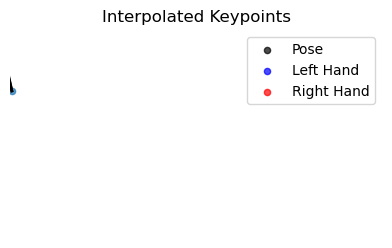

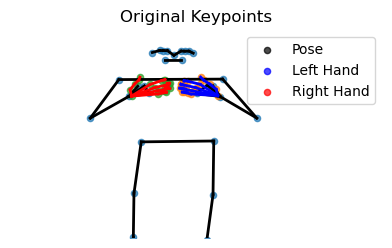

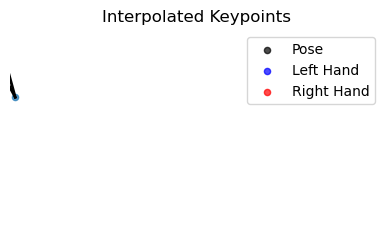

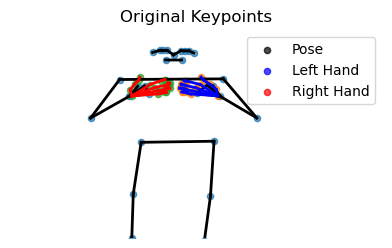

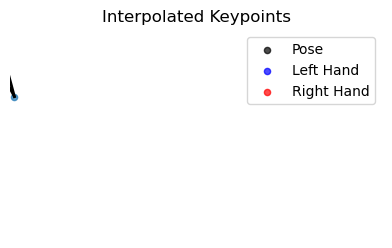

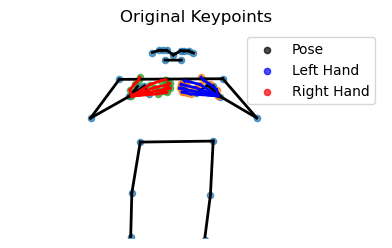

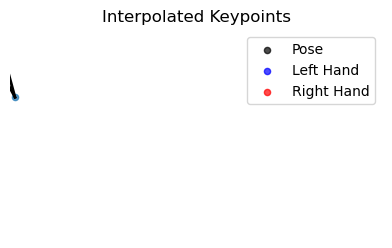

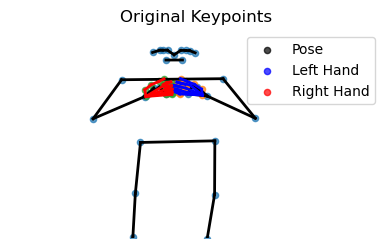

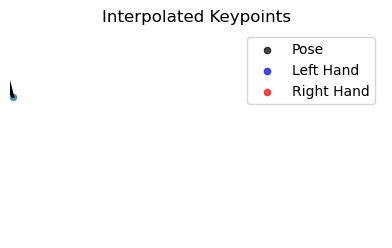

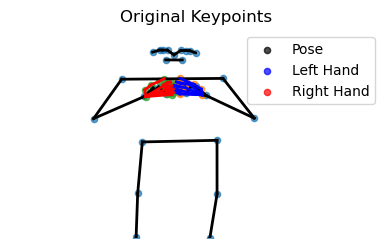

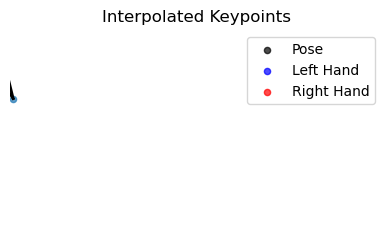

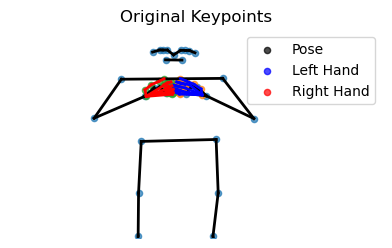

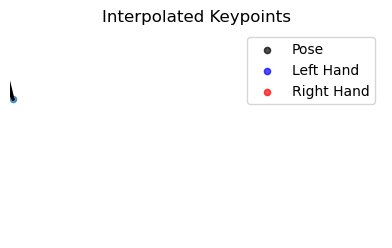

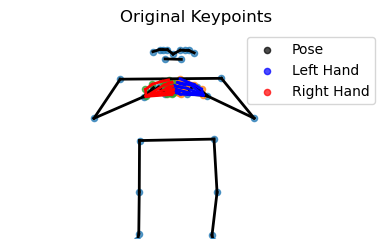

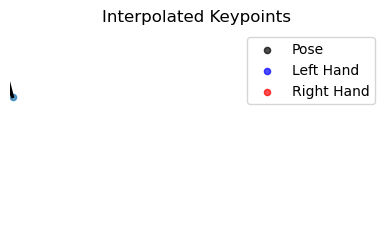

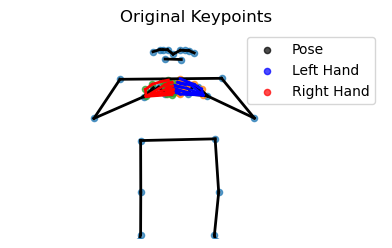

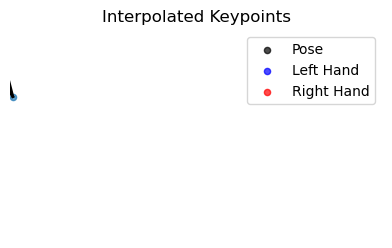

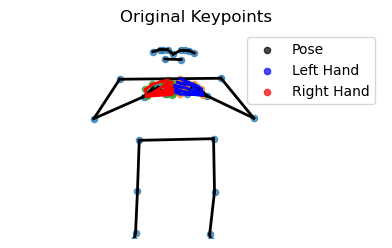

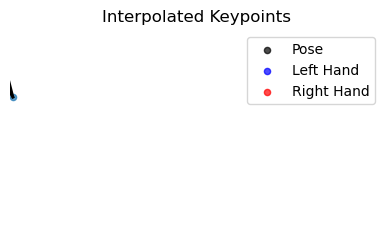

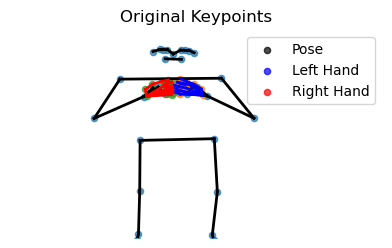

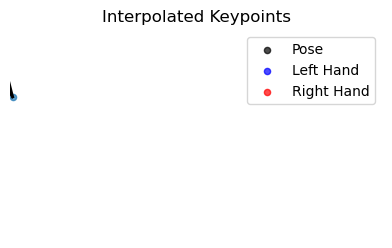

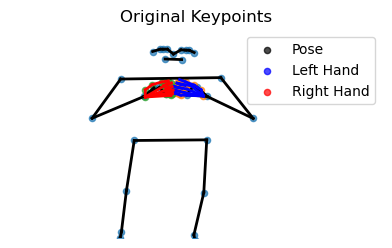

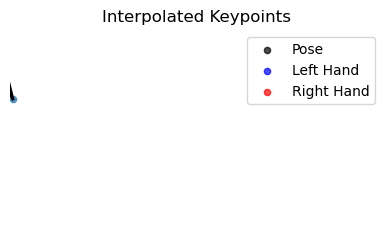

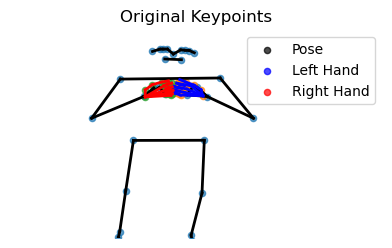

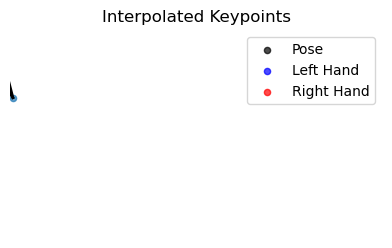

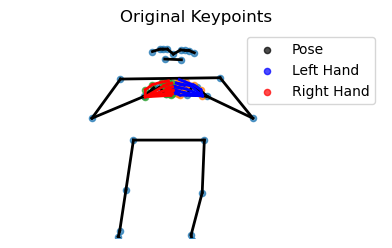

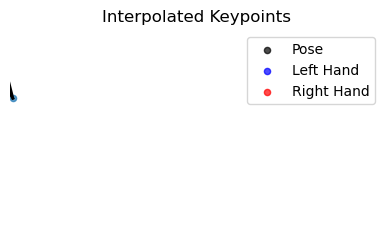

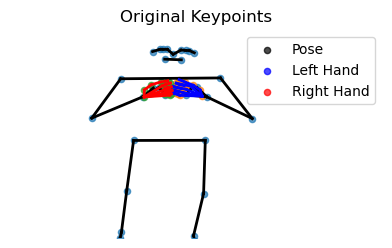

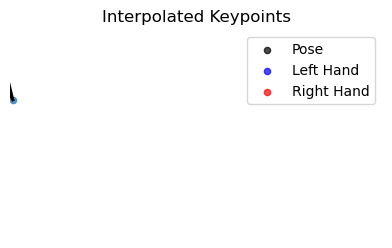

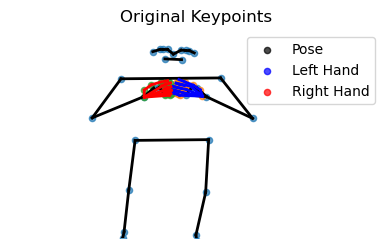

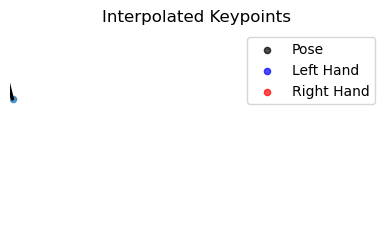

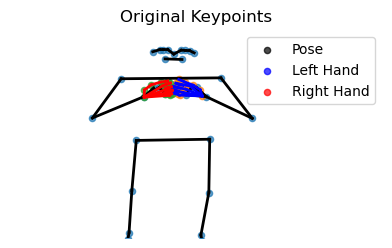

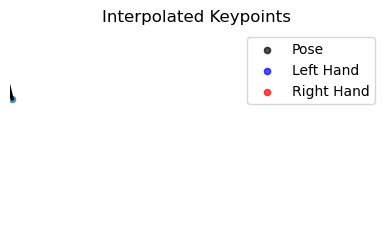

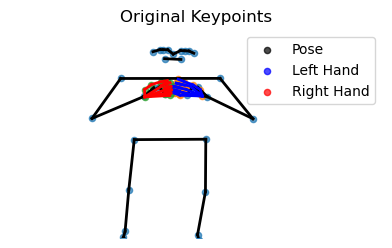

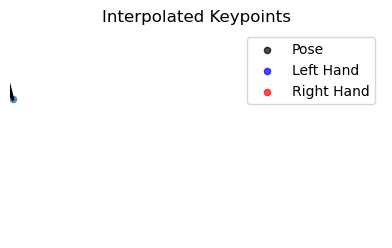

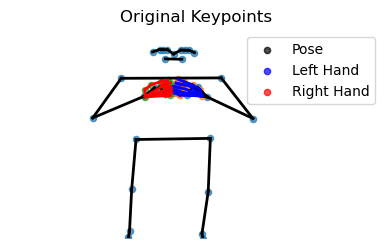

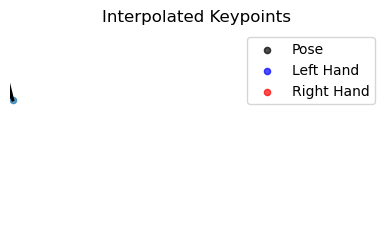

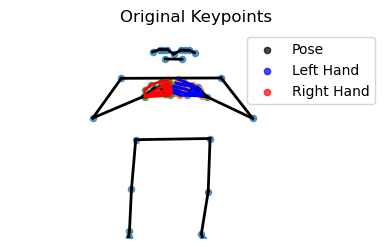

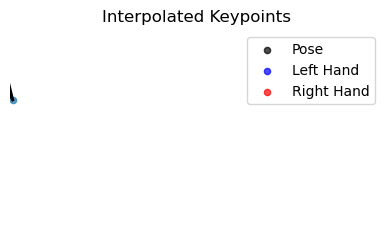

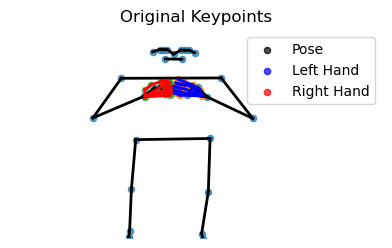

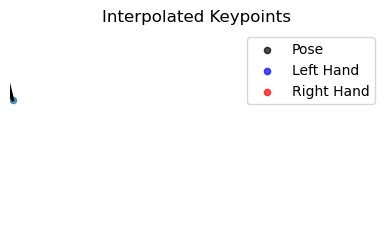

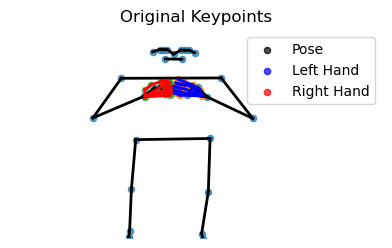

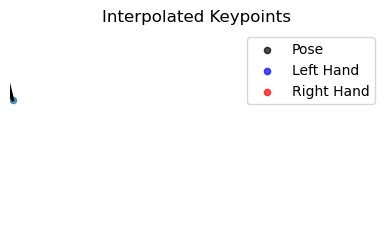

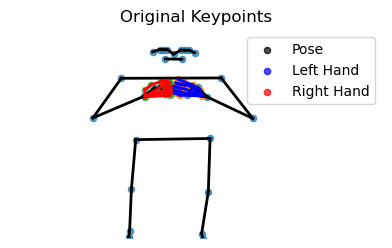

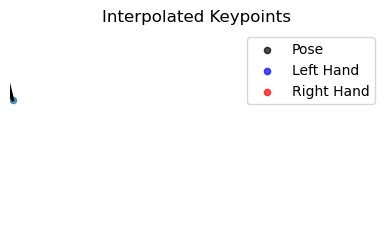

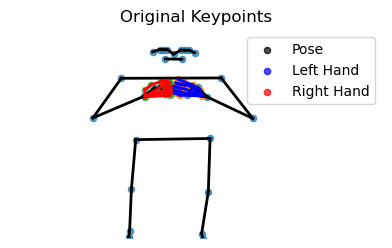

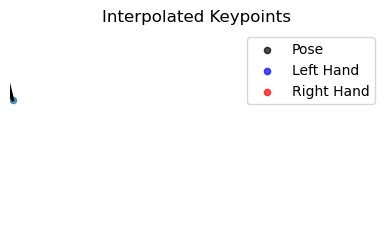

In [25]:
for i in range(30):
    visualize_interpolation('accident', 1, i+1)

##### Gif

### Results

Hujan
| Original | Interpolated |
| ------------- | ------------- |
| ![display image](gif/hujan/landmarks.gif) | ![display image](gif/hujan/interpolated_landmarks.gif) |

Kedai
| Original | Interpolated |
| ------------- | ------------- |
| ![display image](gif/kedai/landmarks.gif) | ![display image](gif/kedai/interpolated_landmarks.gif) |

Ada
| Original | Interpolated |
| ------------- | ------------- |
| ![display image](gif/ada/landmarks.gif) | ![display image](gif/ada/interpolated_landmarks.gif) |

Saudara
| Original | Interpolated |
| ------------- | ------------- |
| ![display image](gif/saudara/landmarks.gif) | ![display image](gif/saudara/interpolated_landmarks.gif) |